In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # vizulization
%matplotlib inline
import seaborn as sns
import re

In [2]:
df=pd.read_csv("tweets.csv",encoding = 'latin',header=None)

In [3]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
df.shape

(1600000, 6)

In [5]:
df=df.rename(columns={0: 'sentiment',1:"id",2:"Date",3:"flag",4:"user",5:"text"})

In [6]:
df.sample(5)

,sentiment,id,Date,flag,user,text
819537,4,1553430522,Sat Apr 18 14:14:47 PDT 2009,NO_QUERY,MyNameIsSKY,@henryandfriends Thank u cool cap by the way ...
14885,0,1553893765,Sat Apr 18 15:30:05 PDT 2009,NO_QUERY,davidixon,"20 to 2, damn Yankees"
803358,4,1468366233,Tue Apr 07 01:13:52 PDT 2009,NO_QUERY,btwiMbomb,@Mrjones2011 gimme some !
384415,0,2053401257,Sat Jun 06 04:25:26 PDT 2009,NO_QUERY,benkurakot,"Yesterday, I was at an NBS branch. I saw Harry..."
312720,0,2001587824,Tue Jun 02 01:23:05 PDT 2009,NO_QUERY,emilytatum,I hate stomachs. I wish there was no such thin...


In [7]:
df = df.drop(['id', 'Date', 'flag', 'user'], axis=1)

In [8]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))

In [9]:
df["text"][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  object
 1   text       1600000 non-null  object
dtypes: object(2)
memory usage: 24.4+ MB


In [11]:
df.duplicated().sum()

16309

In [12]:
df = df.sample(50000)

In [13]:
df["text"]=df["text"].str.lower()

In [14]:
df

,sentiment,text
1272399,Positive,@gebgdc @guilty_ can do it....fucked up yer na...
1202576,Positive,i have used flashpoint pro in the past it was ...
974015,Positive,@dreamingspires that's a long time to be happy
719701,Negative,@nycblondi13 haha no i was in the shower and m...
464441,Negative,"school today, not fair"
...,...,...
74606,Negative,@fstack_ yer exams in 3 weeks maybe less i dunno
973744,Positive,the wall on vinyl
627562,Negative,"@nick___evans sorry bud, that really sucks.."
534901,Negative,misses steph already


In [15]:
# Removed whitespace
df["text"]=df["text"].str.strip()

In [16]:
# remove html 
df['text'] = df['text'].str.replace(r'<.*?>','')

C:\Users\jatin\AppData\Local\Temp\ipykernel_12796\1304196291.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'<.*?>','')


In [17]:
df

,sentiment,text
1272399,Positive,@gebgdc @guilty_ can do it....fucked up yer na...
1202576,Positive,i have used flashpoint pro in the past it was ...
974015,Positive,@dreamingspires that's a long time to be happy
719701,Negative,@nycblondi13 haha no i was in the shower and m...
464441,Negative,"school today, not fair"
...,...,...
74606,Negative,@fstack_ yer exams in 3 weeks maybe less i dunno
973744,Positive,the wall on vinyl
627562,Negative,"@nick___evans sorry bud, that really sucks.."
534901,Negative,misses steph already


In [18]:
df[df['text'].str.contains(r"https?://\S+|www\.\S+",'')].iloc[3].values

array(['Positive',
       '@mitchelmusso http://twitpic.com/6pe9h - love u! your new album is amazing'],
      dtype=object)

In [19]:
# Code to remove url
df['text'] = df['text'].str.replace(r"https?://\S+|www\.\S+",'')

C:\Users\jatin\AppData\Local\Temp\ipykernel_12796\58690510.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r"https?://\S+|www\.\S+",'')


In [20]:
df

,sentiment,text
1272399,Positive,@gebgdc @guilty_ can do it....fucked up yer na...
1202576,Positive,i have used flashpoint pro in the past it was ...
974015,Positive,@dreamingspires that's a long time to be happy
719701,Negative,@nycblondi13 haha no i was in the shower and m...
464441,Negative,"school today, not fair"
...,...,...
74606,Negative,@fstack_ yer exams in 3 weeks maybe less i dunno
973744,Positive,the wall on vinyl
627562,Negative,"@nick___evans sorry bud, that really sucks.."
534901,Negative,misses steph already


In [21]:
# expanding abbvr

# expand 

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [22]:
df['text'] = df['text'].apply(remove_abb)

In [23]:
df["text"]

1272399    @gebgdc @guilty_ can do it....fucked up yer na...
1202576    i have used flashpoint pro in the past it was ...
974015       @dreamingspires that is a long time to be happy
719701     @nycblondi13 haha no i was in the shower and m...
464441                                school today, not fair
                                 ...                        
74606      @fstack_ yer exams in 3 weeks  maybe less i dunno
973744                                     the wall on vinyl
627562          @nick___evans sorry bud, that really sucks..
534901                                  misses steph already
968517     @alexalbrecht you should get both cameras! the...
Name: text, Length: 50000, dtype: object

In [24]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [25]:
#Punctuation
import string

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
def remove_puctuation(text):
    
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
            
    return text

In [28]:
df['text'] = df['text'].apply(remove_puctuation)
df['text'].head()

1272399    gebgdc guilty can do itfucked up yer name on t...
1202576    i have used flashpoint pro in the past it was ...
974015        dreamingspires that is a long time to be happy
719701     nycblondi13 haha no i was in the shower and mi...
464441                                 school today not fair
Name: text, dtype: object

In [29]:
pip install tokenizer

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [31]:
import nltk

# Download the Punkt tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
from nltk.tokenize import word_tokenize

In [33]:
df['tokenized_text'] = df['text'].apply(word_tokenize)

In [34]:
df.head()

,sentiment,text,tokenized_text
1272399,Positive,gebgdc guilty can do itfucked up yer name on t...,"[gebgdc, guilty, can, do, itfucked, up, yer, n..."
1202576,Positive,i have used flashpoint pro in the past it was ...,"[i, have, used, flashpoint, pro, in, the, past..."
974015,Positive,dreamingspires that is a long time to be happy,"[dreamingspires, that, is, a, long, time, to, ..."
719701,Negative,nycblondi13 haha no i was in the shower and mi...,"[nycblondi13, haha, no, i, was, in, the, showe..."
464441,Negative,school today not fair,"[school, today, not, fair]"


In [35]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from nltk.corpus import stopwords
import nltk

# Download the stopwords data if not already downloaded
nltk.download('stopwords')

stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
def remove_stopwords(text):
    
    L = []
    for word in text:
        if word not in stopwords.words('english'):
            L.append(word)
            
    return L

In [38]:
df['tokenized_text'] = df['tokenized_text'].apply(remove_stopwords)

In [39]:
df.head()

,sentiment,text,tokenized_text
1272399,Positive,gebgdc guilty can do itfucked up yer name on t...,"[gebgdc, guilty, itfucked, yer, name, last, tw..."
1202576,Positive,i have used flashpoint pro in the past it was ...,"[used, flashpoint, pro, past, little, big, lum..."
974015,Positive,dreamingspires that is a long time to be happy,"[dreamingspires, long, time, happy]"
719701,Negative,nycblondi13 haha no i was in the shower and mi...,"[nycblondi13, haha, shower, missed, replied]"
464441,Negative,school today not fair,"[school, today, fair]"


In [40]:
df['text'] = df['tokenized_text'].apply(lambda x:" ".join(x))

In [41]:
df.head()

,sentiment,text,tokenized_text
1272399,Positive,gebgdc guilty itfucked yer name last tweet,"[gebgdc, guilty, itfucked, yer, name, last, tw..."
1202576,Positive,used flashpoint pro past little big lumpy look...,"[used, flashpoint, pro, past, little, big, lum..."
974015,Positive,dreamingspires long time happy,"[dreamingspires, long, time, happy]"
719701,Negative,nycblondi13 haha shower missed replied,"[nycblondi13, haha, shower, missed, replied]"
464441,Negative,school today fair,"[school, today, fair]"


In [42]:
df['char_length'] = df['text'].str.len()

In [43]:
df.head()

,sentiment,text,tokenized_text,char_length
1272399,Positive,gebgdc guilty itfucked yer name last tweet,"[gebgdc, guilty, itfucked, yer, name, last, tw...",42
1202576,Positive,used flashpoint pro past little big lumpy look...,"[used, flashpoint, pro, past, little, big, lum...",73
974015,Positive,dreamingspires long time happy,"[dreamingspires, long, time, happy]",30
719701,Negative,nycblondi13 haha shower missed replied,"[nycblondi13, haha, shower, missed, replied]",38
464441,Negative,school today fair,"[school, today, fair]",17


In [44]:
df['word_length'] = df['tokenized_text'].apply(len)

In [45]:
df.head()

,sentiment,text,tokenized_text,char_length,word_length
1272399,Positive,gebgdc guilty itfucked yer name last tweet,"[gebgdc, guilty, itfucked, yer, name, last, tw...",42,7
1202576,Positive,used flashpoint pro past little big lumpy look...,"[used, flashpoint, pro, past, little, big, lum...",73,11
974015,Positive,dreamingspires long time happy,"[dreamingspires, long, time, happy]",30,4
719701,Negative,nycblondi13 haha shower missed replied,"[nycblondi13, haha, shower, missed, replied]",38,5
464441,Negative,school today fair,"[school, today, fair]",17,3


In [46]:
import seaborn as sns

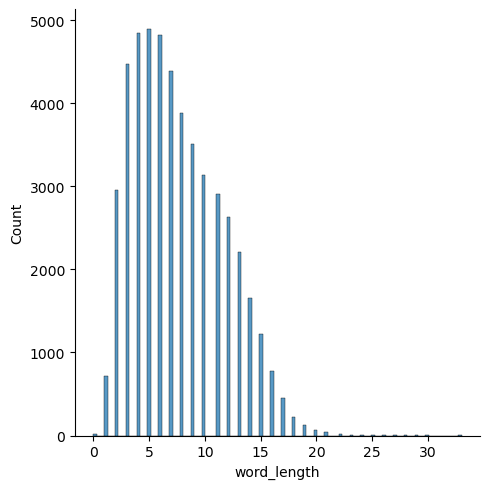

In [47]:
sns.displot(df["word_length"])

C:\Users\jatin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jatin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'plot'

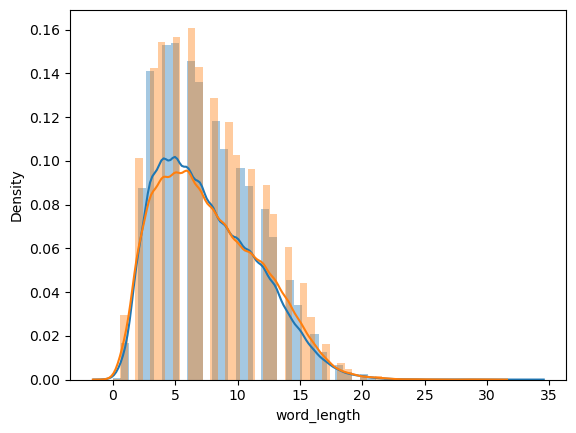

In [48]:
sns.distplot(df[df['sentiment'] == 'Positive']['word_length'])
sns.distplot(df[df['sentiment'] == 'Negative']['word_length'])
sns.plot

C:\Users\jatin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jatin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='char_length', ylabel='Density'>

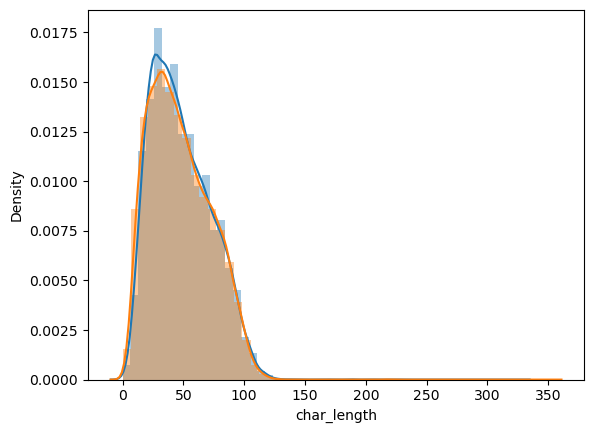

In [49]:
sns.distplot(df[df['sentiment'] == 'Positive']['char_length'])
sns.distplot(df[df['sentiment'] == 'Negative']['char_length'])

In [50]:
df['tokenized_text'].sum()

['gebgdc',
 'guilty',
 'itfucked',
 'yer',
 'name',
 'last',
 'tweet',
 'used',
 'flashpoint',
 'pro',
 'past',
 'little',
 'big',
 'lumpy',
 'looking',
 'something',
 'faster',
 'neater',
 'dreamingspires',
 'long',
 'time',
 'happy',
 'nycblondi13',
 'haha',
 'shower',
 'missed',
 'replied',
 'school',
 'today',
 'fair',
 'welcome',
 'new',
 'twitterbuddies',
 'delighted',
 'see',
 'joining',
 'crazy',
 'gig',
 'second',
 'chardy',
 'checking',
 'new',
 'followers',
 'printed',
 'mom',
 'amazon',
 'gift',
 'card',
 'happy',
 'mothers',
 'day',
 'talk',
 'last',
 'minute',
 'joshuaritmeijer',
 'never',
 'watch',
 'kungfu',
 'movies',
 'I',
 'got',
 '5',
 'quot8squot',
 'mobile',
 'number',
 'last',
 '2',
 'digits',
 '88',
 'never',
 'enough',
 'good',
 'luckfortune',
 'hardest',
 'practice',
 'far',
 'running',
 'tomorrow',
 'lake',
 'wednesday',
 'hopefully',
 'bonfire',
 'friday',
 'twitter',
 'addictivelol',
 'tweting',
 'day',
 'time',
 'get',
 'back',
 'real',
 'world',
 'suprlat

In [51]:
from nltk import ngrams

pd.Series(ngrams(df['tokenized_text'].sum(),2)).value_counts()

(gon, na)                775
(wan, na)                515
(last, night)            356
(got, ta)                305
(good, morning)          303
                        ... 
(sparksthealy, price)      1
(price, range)             1
(range, much)              1
(much, see)                1
(decide, want)             1
Length: 300184, dtype: int64

In [52]:
pd.Series(ngrams(df['tokenized_text'].sum(),3)).value_counts()

(I, gon, na)                       153
(wan, na, go)                      119
(happy, mothers, day)               82
(im, gon, na)                       76
(gon, na, miss)                     75
                                  ... 
(laisanc, food, addict)              1
(momentarily, laisanc, food)         1
(picture, momentarily, laisanc)      1
(link, picture, momentarily)         1
(decide, want, send)                 1
Length: 372837, dtype: int64

In [53]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [54]:
import matplotlib.pyplot as plt

In [55]:
from wordcloud import WordCloud

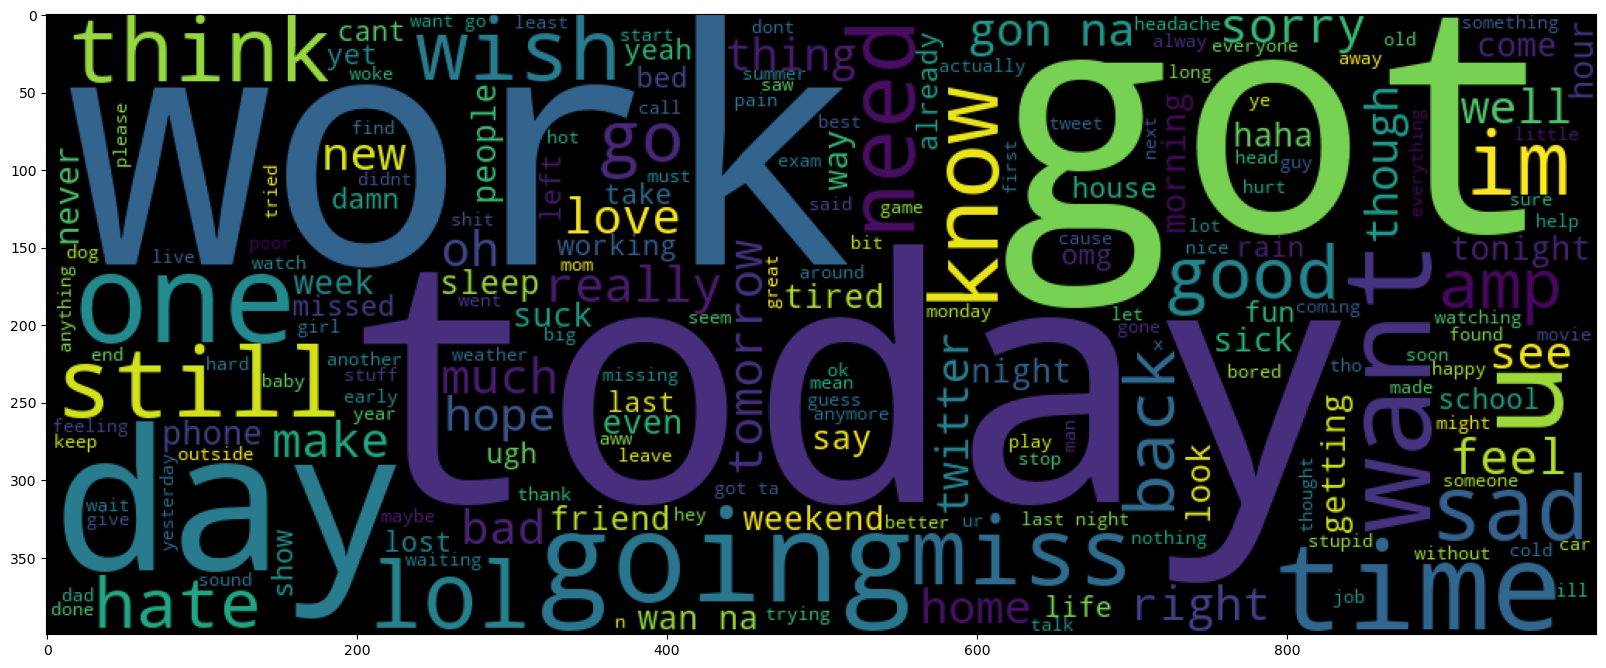

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1000 , height = 400).generate(" ".join(df[df['sentiment'] == 'Negative']['text']))
plt.imshow(wc)

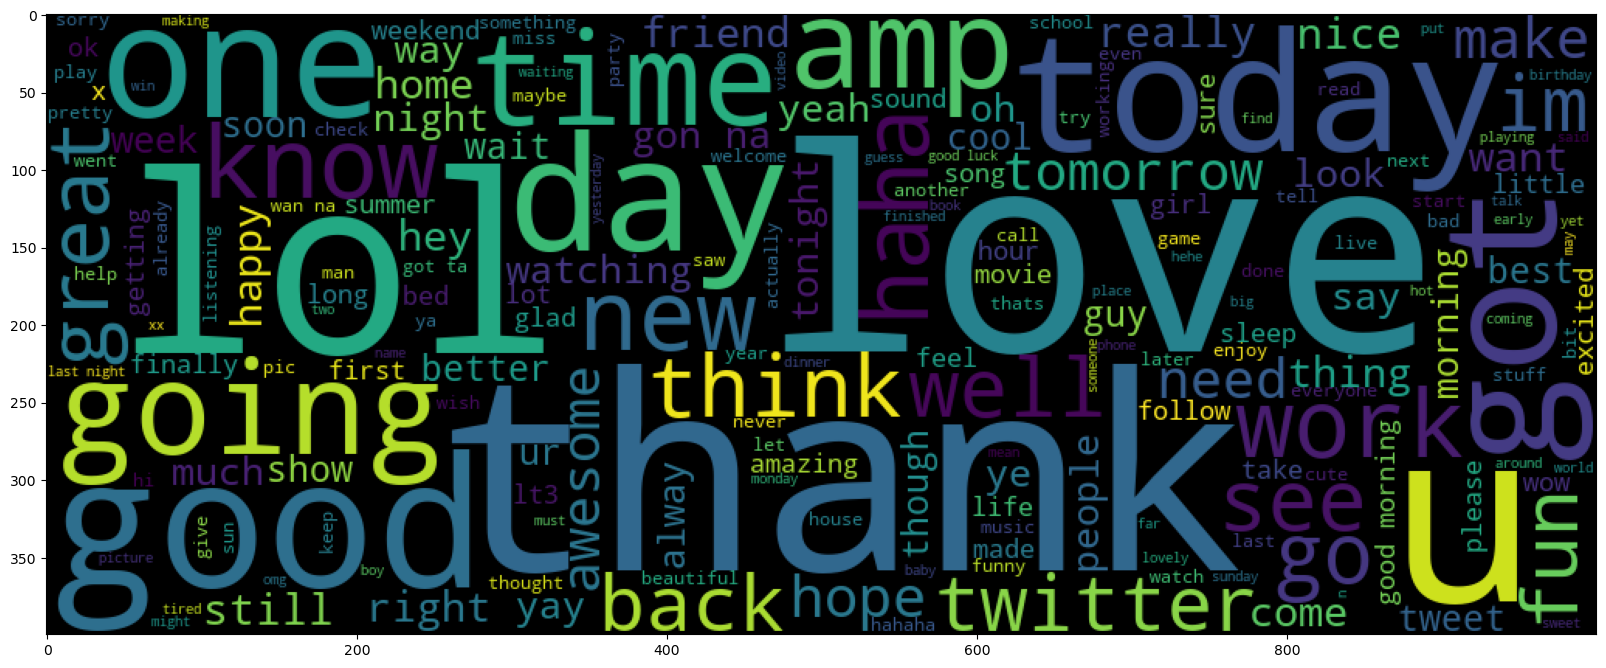

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1000 , height = 400).generate(" ".join(df[df['sentiment'] == 'Positive']['text']))
plt.imshow(wc)

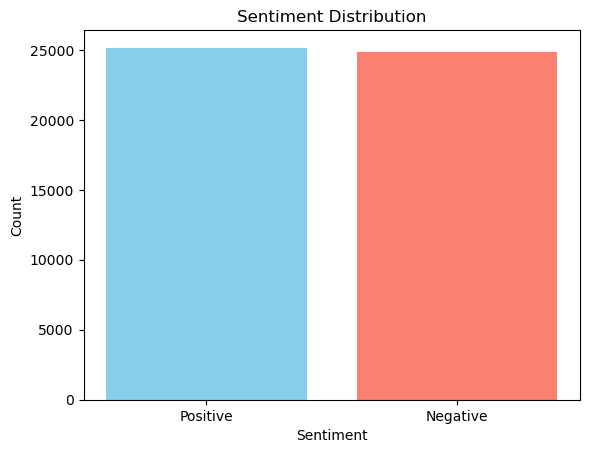

In [58]:
# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'salmon'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Documentation
Twitter Sentiment Analysis Project Documentation 
 
Project Overview: 
The Twitter Sentiment Analysis project involves analyzing a dataset of tweets to determine the sentiment expressed in each tweet, categorizing it as either positive or negative. The goal is to gain insights into public opinions and sentiments shared on Twitter, utilizing various data preprocessing and visualization techniques. 
 
Code Implementation: 
The provided Python code demonstrates the data preprocessing steps and sentiment visualization using various libraries such as pandas, matplotlib, seaborn, and wordcloud. Here's a brief overview of the code: 
 
Data Loading and Exploration: 
 
Reads the dataset ('tweets.csv') using pandas. 
Renames columns for better readability. 
Drops unnecessary columns ('id', 'Date', 'flag', 'user'). 
Data Cleaning: 
 
Decodes sentiment labels (0 and 4) into meaningful categories (Negative and Positive). 
Handles duplicate entries and missing values. 
Reduces the dataset size to 50,000 randomly sampled tweets. 
Text Preprocessing: 
 
Converts text to lowercase. 
Removes leading and trailing whitespaces. 
Removes HTML tags and URLs. 
Expands abbreviations. 
Removes punctuation. 
Tokenizes the text. 
Removes stop words. 
Exploratory Data Analysis (EDA): 
 
Visualizes the distribution of sentiment labels using a bar chart. 
Analyzes word and character lengths distribution. 
Word Clouds: 
 
Generates word clouds for both positive and negative sentiments to visualize frequent words. 
Dependencies: 
 
The code requires the installation of various Python libraries, including pandas, matplotlib, seaborn, wordcloud, and nltk. Ensure they are installed before running the code. 
Conclusion: 
The Twitter Sentiment Analysis project aims to provide a preliminary understanding of sentiment distribution in a Twitter dataset. The documentation serves as a guide for understanding the project objectives, steps, and code implementation. Further development may include sentiment prediction models and more in-depth analysis of feature importance.